# Dataset Understanding and Exploration
## COVID-19 Social Media Sentiment & Recovery Patterns Analysis

This notebook provides a comprehensive examination of all four datasets:
1. COVID-19 Tweets Dataset
2. Google COVID-19 Community Mobility Reports
3. Oxford COVID-19 Government Response Tracker (OxCGRT)
4. JHU CSSE COVID-19 Data Repository

**Author:** Data Visualization Course Project  
**Date:** July 2025  
**Objective:** Understand data structure, quality, and prepare for advanced analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.1
NumPy version: 2.3.1


## 1. COVID-19 Tweets Dataset Analysis

This dataset contains tweets with #covid19 hashtag, providing the foundation for sentiment and topic analysis.

In [2]:
# Load COVID-19 tweets dataset
print("Loading COVID-19 Tweets Dataset...")
tweets_df = pd.read_csv('../data/raw/covid19_tweets/covid19_tweets.csv')

print(f"Dataset Shape: {tweets_df.shape}")
print(f"\nColumn Names:")
for i, col in enumerate(tweets_df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nData Types:")
print(tweets_df.dtypes)

Loading COVID-19 Tweets Dataset...
Dataset Shape: (179108, 13)

Column Names:
 1. user_name
 2. user_location
 3. user_description
 4. user_created
 5. user_followers
 6. user_friends
 7. user_favourites
 8. user_verified
 9. date
10. text
11. hashtags
12. source
13. is_retweet

Data Types:
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object
Dataset Shape: (179108, 13)

Column Names:
 1. user_name
 2. user_location
 3. user_description
 4. user_created
 5. user_followers
 6. user_friends
 7. user_favourites
 8. user_verified
 9. date
10. text
11. hashtags
12. source
13. is_retweet

Data Types:
user_name           object
user_location       object
user_description    object
user_

In [3]:
# Examine first few rows
print("First 3 rows of the tweets dataset:")
tweets_df.head(3)

First 3 rows of the tweets dataset:


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False


In [4]:
# Basic statistics and data quality assessment
print("TWEETS DATASET - DATA QUALITY ASSESSMENT")
print("=" * 50)

# Missing values
print("\nMissing Values:")
missing_data = tweets_df.isnull().sum()
missing_percent = (missing_data / len(tweets_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Date range
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
print(f"\nDate Range: {tweets_df['date'].min()} to {tweets_df['date'].max()}")
print(f"Total Days: {(tweets_df['date'].max() - tweets_df['date'].min()).days}")

# User location analysis
print(f"\nUser Location Data:")
print(f"Total tweets: {len(tweets_df):,}")
print(f"Tweets with location: {tweets_df['user_location'].notna().sum():,}")
print(f"Location coverage: {(tweets_df['user_location'].notna().sum() / len(tweets_df)) * 100:.1f}%")

TWEETS DATASET - DATA QUALITY ASSESSMENT

Missing Values:
                  Missing Count  Missing %
user_location             36771  20.530071
user_description          10286   5.742904
hashtags                  51334  28.660920
source                       77   0.042991

Date Range: 2020-07-24 23:47:08 to 2020-08-30 09:07:39
Total Days: 36

User Location Data:
Total tweets: 179,108
Tweets with location: 142,337
Location coverage: 79.5%


In [5]:
# Temporal distribution of tweets
daily_tweets = tweets_df.groupby(tweets_df['date'].dt.date).size()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=daily_tweets.index,
    y=daily_tweets.values,
    mode='lines',
    name='Daily Tweet Count',
    line=dict(color='#1f77b4', width=2)
))

fig.update_layout(
    title='Daily COVID-19 Tweet Volume Over Time',
    xaxis_title='Date',
    yaxis_title='Number of Tweets',
    template='plotly_white',
    height=400
)

fig.show()

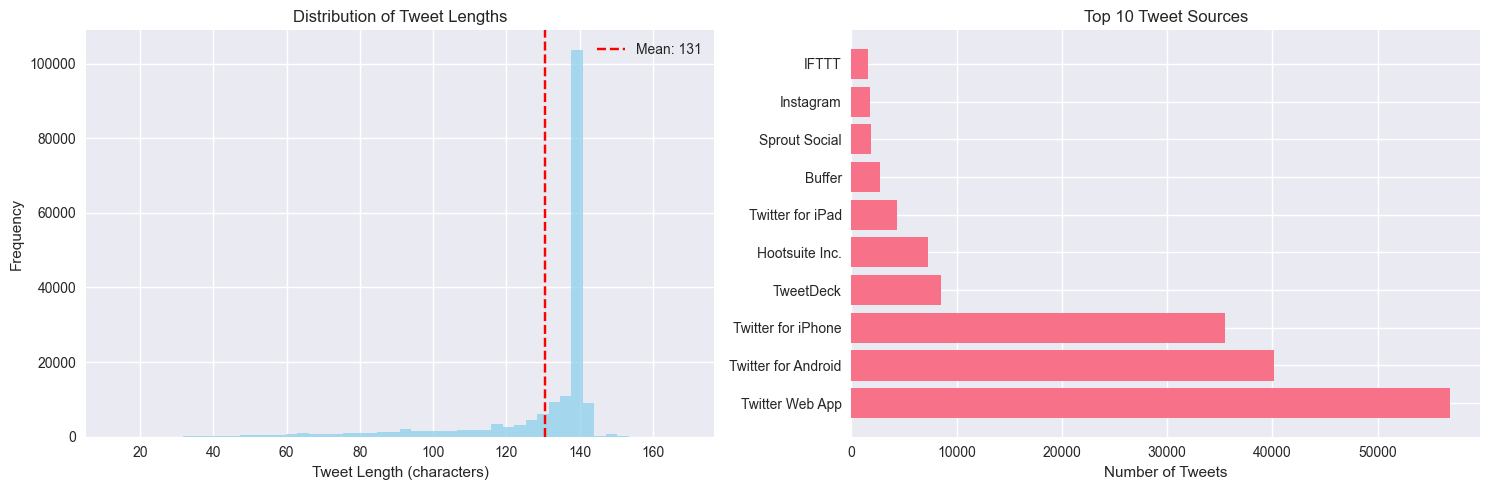

Average tweet length: 130.5 characters
Median tweet length: 140.0 characters


In [6]:
# Text analysis - tweet length distribution
tweets_df['text_length'] = tweets_df['text'].astype(str).apply(len)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Tweet length distribution
ax1.hist(tweets_df['text_length'], bins=50, alpha=0.7, color='skyblue')
ax1.set_xlabel('Tweet Length (characters)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Tweet Lengths')
ax1.axvline(tweets_df['text_length'].mean(), color='red', linestyle='--', 
           label=f'Mean: {tweets_df["text_length"].mean():.0f}')
ax1.legend()

# Source analysis
top_sources = tweets_df['source'].value_counts().head(10)
ax2.barh(top_sources.index, top_sources.values)
ax2.set_xlabel('Number of Tweets')
ax2.set_title('Top 10 Tweet Sources')

plt.tight_layout()
plt.show()

print(f"Average tweet length: {tweets_df['text_length'].mean():.1f} characters")
print(f"Median tweet length: {tweets_df['text_length'].median():.1f} characters")

## 2. Google Mobility Reports Analysis

This dataset tracks movement trends by location category relative to a baseline period.

In [7]:
# Load Google Mobility dataset
print("Loading Google Mobility Dataset...")
mobility_df = pd.read_csv('../data/raw/google_mobility/Global_Mobility_Report.csv')

print(f"Dataset Shape: {mobility_df.shape}")
print(f"\nColumn Names:")
for i, col in enumerate(mobility_df.columns, 1):
    print(f"{i:2d}. {col}")

# Focus on mobility-specific columns
mobility_cols = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline', 
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]

print(f"\nMobility Categories:")
for i, col in enumerate(mobility_cols, 1):
    short_name = col.replace('_percent_change_from_baseline', '')
    print(f"{i}. {short_name}")

Loading Google Mobility Dataset...
Dataset Shape: (11730025, 15)

Column Names:
 1. country_region_code
 2. country_region
 3. sub_region_1
 4. sub_region_2
 5. metro_area
 6. iso_3166_2_code
 7. census_fips_code
 8. place_id
 9. date
10. retail_and_recreation_percent_change_from_baseline
11. grocery_and_pharmacy_percent_change_from_baseline
12. parks_percent_change_from_baseline
13. transit_stations_percent_change_from_baseline
14. workplaces_percent_change_from_baseline
15. residential_percent_change_from_baseline

Mobility Categories:
1. retail_and_recreation
2. grocery_and_pharmacy
3. parks
4. transit_stations
5. workplaces
6. residential
Dataset Shape: (11730025, 15)

Column Names:
 1. country_region_code
 2. country_region
 3. sub_region_1
 4. sub_region_2
 5. metro_area
 6. iso_3166_2_code
 7. census_fips_code
 8. place_id
 9. date
10. retail_and_recreation_percent_change_from_baseline
11. grocery_and_pharmacy_percent_change_from_baseline
12. parks_percent_change_from_baseline
1

In [8]:
# Data quality assessment for mobility data
mobility_df['date'] = pd.to_datetime(mobility_df['date'])

print("GOOGLE MOBILITY DATASET - DATA QUALITY ASSESSMENT")
print("=" * 55)

print(f"Date Range: {mobility_df['date'].min()} to {mobility_df['date'].max()}")
print(f"Number of Countries/Regions: {mobility_df['country_region'].nunique()}")
print(f"Total Records: {len(mobility_df):,}")

# Missing values in mobility columns
print("\nMissing Values in Mobility Categories:")
for col in mobility_cols:
    missing_pct = (mobility_df[col].isnull().sum() / len(mobility_df)) * 100
    print(f"{col.replace('_percent_change_from_baseline', ''):20s}: {missing_pct:5.1f}%")

# Sample countries
print(f"\nSample Countries:")
countries = mobility_df['country_region'].unique()[:10]
for country in countries:
    print(f"- {country}")

GOOGLE MOBILITY DATASET - DATA QUALITY ASSESSMENT
Date Range: 2020-02-15 00:00:00 to 2022-10-15 00:00:00
Number of Countries/Regions: 135
Total Records: 11,730,025

Missing Values in Mobility Categories:
retail_and_recreation:  38.1%
grocery_and_pharmacy:  41.0%
parks               :  53.2%
transit_stations    :  50.5%
workplaces          :   3.5%
residential         :  38.2%

Sample Countries:
Number of Countries/Regions: 135
Total Records: 11,730,025

Missing Values in Mobility Categories:
retail_and_recreation:  38.1%
grocery_and_pharmacy:  41.0%
parks               :  53.2%
transit_stations    :  50.5%
workplaces          :   3.5%
residential         :  38.2%

Sample Countries:
- United Arab Emirates
- Afghanistan
- Antigua and Barbuda
- Angola
- Argentina
- Austria
- Australia
- Aruba
- Bosnia and Herzegovina
- Barbados
- United Arab Emirates
- Afghanistan
- Antigua and Barbuda
- Angola
- Argentina
- Austria
- Australia
- Aruba
- Bosnia and Herzegovina
- Barbados


In [9]:
# Global mobility trends analysis
# Filter for country-level data (no sub-regions)
country_level = mobility_df[mobility_df['sub_region_1'].isnull()].copy()

# Calculate global averages by date
global_mobility = country_level.groupby('date')[mobility_cols].mean().reset_index()

# Create interactive plot for global mobility trends
fig = go.Figure()

colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
short_names = [col.replace('_percent_change_from_baseline', '').replace('_', ' ').title() 
               for col in mobility_cols]

for i, col in enumerate(mobility_cols):
    fig.add_trace(go.Scatter(
        x=global_mobility['date'],
        y=global_mobility[col],
        mode='lines',
        name=short_names[i],
        line=dict(color=colors[i], width=2)
    ))

fig.update_layout(
    title='Global COVID-19 Mobility Trends (Country Averages)',
    xaxis_title='Date',
    yaxis_title='Percent Change from Baseline',
    template='plotly_white',
    height=500,
    hovermode='x unified'
)

fig.add_hline(y=0, line_dash="dash", line_color="black", opacity=0.5)
fig.show()

## 3. Oxford COVID-19 Government Response Tracker (OxCGRT)

This dataset systematically tracks government policy responses across countries.

In [10]:
# Load Oxford Government Response dataset
print("Loading Oxford Government Response Dataset...")
oxford_df = pd.read_csv('../data/raw/oxford_government_response/OxCGRT_compact_national_v1.csv')

print(f"Dataset Shape: {oxford_df.shape}")
print(f"Number of Countries: {oxford_df['CountryName'].nunique()}")

# Convert date
oxford_df['Date'] = pd.to_datetime(oxford_df['Date'], format='%Y%m%d')
print(f"Date Range: {oxford_df['Date'].min()} to {oxford_df['Date'].max()}")

# Key policy indicators
policy_columns = [
    'C1M_School closing',
    'C2M_Workplace closing', 
    'C3M_Cancel public events',
    'C4M_Restrictions on gatherings',
    'C5M_Close public transport',
    'C6M_Stay at home requirements',
    'C7M_Restrictions on internal movement',
    'C8EV_International travel controls'
]

economic_columns = [
    'E1_Income support',
    'E2_Debt/contract relief',
    'E3_Fiscal measures',
    'E4_International support'
]

print(f"\nKey Policy Indicators Available:")
for col in policy_columns:
    print(f"- {col}")
    
print(f"\nEconomic Support Indicators:")
for col in economic_columns:
    print(f"- {col}")

Loading Oxford Government Response Dataset...
Dataset Shape: (202760, 56)
Number of Countries: 185
Date Range: 2020-01-01 00:00:00 to 2022-12-31 00:00:00

Key Policy Indicators Available:
- C1M_School closing
- C2M_Workplace closing
- C3M_Cancel public events
- C4M_Restrictions on gatherings
- C5M_Close public transport
- C6M_Stay at home requirements
- C7M_Restrictions on internal movement
- C8EV_International travel controls

Economic Support Indicators:
- E1_Income support
- E2_Debt/contract relief
- E3_Fiscal measures
- E4_International support
Dataset Shape: (202760, 56)
Number of Countries: 185
Date Range: 2020-01-01 00:00:00 to 2022-12-31 00:00:00

Key Policy Indicators Available:
- C1M_School closing
- C2M_Workplace closing
- C3M_Cancel public events
- C4M_Restrictions on gatherings
- C5M_Close public transport
- C6M_Stay at home requirements
- C7M_Restrictions on internal movement
- C8EV_International travel controls

Economic Support Indicators:
- E1_Income support
- E2_Debt/

In [11]:
# Examine the key composite indices
print("OXFORD GOVERNMENT RESPONSE - KEY INDICES")
print("=" * 45)

index_columns = [
    'StringencyIndex_Average',
    'GovernmentResponseIndex_Average', 
    'ContainmentHealthIndex_Average',
    'EconomicSupportIndex'
]

print("\nComposite Indices Available:")
for col in index_columns:
    if col in oxford_df.columns:
        missing_pct = (oxford_df[col].isnull().sum() / len(oxford_df)) * 100
        min_val = oxford_df[col].min()
        max_val = oxford_df[col].max()
        print(f"{col:30s}: Range [{min_val:5.1f}, {max_val:5.1f}], Missing: {missing_pct:4.1f}%")

# Sample countries for detailed analysis
sample_countries = ['United States', 'United Kingdom', 'Germany', 'Italy', 'France']
print(f"\nSample Countries in Dataset:")
for country in sample_countries:
    count = len(oxford_df[oxford_df['CountryName'] == country])
    print(f"{country:15s}: {count:4d} records")

OXFORD GOVERNMENT RESPONSE - KEY INDICES

Composite Indices Available:
StringencyIndex_Average       : Range [  0.0, 100.0], Missing:  0.0%
GovernmentResponseIndex_Average: Range [  0.0,  91.2], Missing:  0.0%
ContainmentHealthIndex_Average: Range [  0.0,  93.5], Missing:  0.0%
EconomicSupportIndex          : Range [  0.0, 100.0], Missing:  0.0%

Sample Countries in Dataset:
United States  : 1096 records
United Kingdom : 1096 records
Germany        : 1096 records
Italy          : 1096 records
France         : 1096 records


In [12]:
# Visualize stringency and economic support trends
sample_countries_data = oxford_df[oxford_df['CountryName'].isin(sample_countries)].copy()

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Stringency Index Over Time', 'Economic Support Index Over Time'),
    vertical_spacing=0.08
)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, country in enumerate(sample_countries):
    country_data = sample_countries_data[sample_countries_data['CountryName'] == country]
    
    # Stringency Index
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['StringencyIndex_Average'],
            mode='lines',
            name=f'{country} - Stringency',
            line=dict(color=colors[i], width=2),
            showlegend=True
        ),
        row=1, col=1
    )
    
    # Economic Support Index
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['EconomicSupportIndex'],
            mode='lines',
            name=f'{country} - Economic',
            line=dict(color=colors[i], width=2, dash='dot'),
            showlegend=True
        ),
        row=2, col=1
    )

fig.update_layout(
    title='Government Response Indices: Stringency vs Economic Support',
    template='plotly_white',
    height=600
)

fig.update_yaxes(title_text="Stringency Index (0-100)", row=1, col=1)
fig.update_yaxes(title_text="Economic Support Index (0-100)", row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

fig.show()

## 4. JHU CSSE COVID-19 Data Repository

This provides the epidemiological foundation with confirmed cases and deaths data.

In [13]:
# Load JHU CSSE datasets
print("Loading JHU CSSE COVID-19 Datasets...")

# Load confirmed cases
cases_df = pd.read_csv('../data/raw/jhu_csse/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('../data/raw/jhu_csse/time_series_covid19_deaths_global.csv')

print(f"Confirmed Cases Dataset Shape: {cases_df.shape}")
print(f"Deaths Dataset Shape: {deaths_df.shape}")

# Examine structure
print(f"\nFirst 4 columns (metadata): {cases_df.columns[:4].tolist()}")
print(f"Date columns: {len(cases_df.columns) - 4} days")
print(f"Date range: {cases_df.columns[4]} to {cases_df.columns[-1]}")

# Countries/regions
print(f"\nNumber of countries/regions: {cases_df['Country/Region'].nunique()}")
print(f"Sample countries: {cases_df['Country/Region'].unique()[:5].tolist()}")

Loading JHU CSSE COVID-19 Datasets...
Confirmed Cases Dataset Shape: (289, 1147)
Deaths Dataset Shape: (289, 1147)

First 4 columns (metadata): ['Province/State', 'Country/Region', 'Lat', 'Long']
Date columns: 1143 days
Date range: 1/22/20 to 3/9/23

Number of countries/regions: 201
Sample countries: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']
Confirmed Cases Dataset Shape: (289, 1147)
Deaths Dataset Shape: (289, 1147)

First 4 columns (metadata): ['Province/State', 'Country/Region', 'Lat', 'Long']
Date columns: 1143 days
Date range: 1/22/20 to 3/9/23

Number of countries/regions: 201
Sample countries: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']


In [14]:
# Transform JHU data to long format for analysis
def transform_jhu_data(df, value_name):
    """Transform JHU wide format to long format"""
    # Melt the dataframe
    date_cols = df.columns[4:]  # Date columns start from index 4
    
    df_melted = df.melt(
        id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
        value_vars=date_cols,
        var_name='Date',
        value_name=value_name
    )
    
    # Convert date
    df_melted['Date'] = pd.to_datetime(df_melted['Date'])
    
    return df_melted

# Transform both datasets
cases_long = transform_jhu_data(cases_df, 'Confirmed_Cases')
deaths_long = transform_jhu_data(deaths_df, 'Deaths')

print(f"Transformed Cases Dataset Shape: {cases_long.shape}")
print(f"Transformed Deaths Dataset Shape: {deaths_long.shape}")
print(f"\nDate range: {cases_long['Date'].min()} to {cases_long['Date'].max()}")

Transformed Cases Dataset Shape: (330327, 6)
Transformed Deaths Dataset Shape: (330327, 6)

Date range: 2020-01-22 00:00:00 to 2023-03-09 00:00:00


In [15]:
# Aggregate by country and calculate daily new cases
country_cases = cases_long.groupby(['Country/Region', 'Date'])['Confirmed_Cases'].sum().reset_index()
country_deaths = deaths_long.groupby(['Country/Region', 'Date'])['Deaths'].sum().reset_index()

# Calculate daily new cases (difference from cumulative)
country_cases = country_cases.sort_values(['Country/Region', 'Date'])
country_cases['Daily_New_Cases'] = country_cases.groupby('Country/Region')['Confirmed_Cases'].diff().fillna(0)

# Handle negative values (data corrections)
country_cases['Daily_New_Cases'] = country_cases['Daily_New_Cases'].clip(lower=0)

print(f"Country-level Cases Dataset Shape: {country_cases.shape}")
print(f"Countries with data: {country_cases['Country/Region'].nunique()}")

# Global statistics
global_total_cases = country_cases.groupby('Date')['Confirmed_Cases'].sum()
global_daily_cases = country_cases.groupby('Date')['Daily_New_Cases'].sum()

print(f"\nGlobal Statistics (as of latest date):")
print(f"Total Confirmed Cases: {global_total_cases.iloc[-1]:,}")
print(f"Peak Daily Cases: {global_daily_cases.max():,} on {global_daily_cases.idxmax().strftime('%Y-%m-%d')}")

Country-level Cases Dataset Shape: (229743, 4)
Countries with data: 201

Global Statistics (as of latest date):
Total Confirmed Cases: 676,570,149
Peak Daily Cases: 4,083,281.0 on 2022-01-19


In [16]:
# Visualize global case trends
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Global Cumulative Cases', 'Global Daily New Cases (7-day average)'),
    vertical_spacing=0.08
)

# Cumulative cases
fig.add_trace(
    go.Scatter(
        x=global_total_cases.index,
        y=global_total_cases.values,
        mode='lines',
        name='Cumulative Cases',
        line=dict(color='#d62728', width=2)
    ),
    row=1, col=1
)

# Daily new cases with 7-day average
daily_7day_avg = global_daily_cases.rolling(window=7, center=True).mean()

fig.add_trace(
    go.Scatter(
        x=global_daily_cases.index,
        y=global_daily_cases.values,
        mode='lines',
        name='Daily Cases',
        line=dict(color='lightblue', width=1),
        opacity=0.5
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=daily_7day_avg.index,
        y=daily_7day_avg.values,
        mode='lines',
        name='7-day Average',
        line=dict(color='#1f77b4', width=3)
    ),
    row=2, col=1
)

fig.update_layout(
    title='Global COVID-19 Case Trends',
    template='plotly_white',
    height=600
)

fig.update_yaxes(title_text="Cumulative Cases", row=1, col=1)
fig.update_yaxes(title_text="Daily New Cases", row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

fig.show()

## 5. Cross-Dataset Integration Assessment

Now we'll examine how well these datasets can be integrated for our research questions.

In [17]:
# Date range comparison across datasets
print("CROSS-DATASET INTEGRATION ASSESSMENT")
print("=" * 40)

dataset_info = {
    'COVID-19 Tweets': {
        'start': tweets_df['date'].min(),
        'end': tweets_df['date'].max(),
        'records': len(tweets_df)
    },
    'Google Mobility': {
        'start': mobility_df['date'].min(),
        'end': mobility_df['date'].max(),
        'records': len(mobility_df)
    },
    'Oxford Government': {
        'start': oxford_df['Date'].min(),
        'end': oxford_df['Date'].max(),
        'records': len(oxford_df)
    },
    'JHU CSSE Cases': {
        'start': cases_long['Date'].min(),
        'end': cases_long['Date'].max(),
        'records': len(cases_long)
    }
}

print("\nDataset Date Ranges:")
for dataset, info in dataset_info.items():
    duration = (info['end'] - info['start']).days
    print(f"{dataset:18s}: {info['start'].strftime('%Y-%m-%d')} to {info['end'].strftime('%Y-%m-%d')} ({duration:4d} days, {info['records']:,} records)")

# Find common date range
start_dates = [info['start'] for info in dataset_info.values()]
end_dates = [info['end'] for info in dataset_info.values()]

common_start = max(start_dates)
common_end = min(end_dates)
common_duration = (common_end - common_start).days

print(f"\nCommon Date Range: {common_start.strftime('%Y-%m-%d')} to {common_end.strftime('%Y-%m-%d')} ({common_duration} days)")

CROSS-DATASET INTEGRATION ASSESSMENT

Dataset Date Ranges:
COVID-19 Tweets   : 2020-07-24 to 2020-08-30 (  36 days, 179,108 records)
Google Mobility   : 2020-02-15 to 2022-10-15 ( 973 days, 11,730,025 records)
Oxford Government : 2020-01-01 to 2022-12-31 (1095 days, 202,760 records)
JHU CSSE Cases    : 2020-01-22 to 2023-03-09 (1142 days, 330,327 records)

Common Date Range: 2020-07-24 to 2020-08-30 (36 days)


In [18]:
# Country/location matching assessment
print("\nCOUNTRY/LOCATION MATCHING ASSESSMENT")
print("=" * 40)

# Extract unique countries from each dataset
mobility_countries = set(mobility_df[mobility_df['sub_region_1'].isnull()]['country_region'].unique())
oxford_countries = set(oxford_df['CountryName'].unique())
jhu_countries = set(cases_long['Country/Region'].unique())

print(f"Google Mobility countries: {len(mobility_countries)}")
print(f"Oxford Government countries: {len(oxford_countries)}")
print(f"JHU CSSE countries: {len(jhu_countries)}")

# Find common countries across three main datasets
# Note: Tweets have user_location which is more complex to standardize
common_countries = mobility_countries.intersection(oxford_countries).intersection(jhu_countries)
print(f"\nCountries present in all three datasets: {len(common_countries)}")

# Sample of common countries
sample_common = sorted(list(common_countries))[:10]
print(f"\nSample common countries:")
for country in sample_common:
    print(f"- {country}")

# Countries missing from each dataset
print(f"\nCountries in Mobility but not in Oxford: {len(mobility_countries - oxford_countries)}")
print(f"Countries in Oxford but not in Mobility: {len(oxford_countries - mobility_countries)}")
print(f"Countries in JHU but not in Mobility: {len(jhu_countries - mobility_countries)}")


COUNTRY/LOCATION MATCHING ASSESSMENT
Google Mobility countries: 135
Oxford Government countries: 185
JHU CSSE countries: 201

Countries present in all three datasets: 118

Sample common countries:
- Afghanistan
- Angola
- Argentina
- Australia
- Austria
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium

Countries in Mobility but not in Oxford: 10
Countries in Oxford but not in Mobility: 60
Countries in JHU but not in Mobility: 77
Google Mobility countries: 135
Oxford Government countries: 185
JHU CSSE countries: 201

Countries present in all three datasets: 118

Sample common countries:
- Afghanistan
- Angola
- Argentina
- Australia
- Austria
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium

Countries in Mobility but not in Oxford: 10
Countries in Oxford but not in Mobility: 60
Countries in JHU but not in Mobility: 77


In [19]:
# Create a master data dictionary for analysis
master_dict = {
    'Variable Name': [
        'date', 'country_name', 
        # Sentiment variables
        'vader_compound', 'emotion_fear', 'emotion_joy', 'emotion_anger',
        'topic_misinformation_prevalence', 'topic_fatigue_prevalence',
        # Mobility variables  
        'mobility_retail_recreation', 'mobility_grocery_pharmacy', 'mobility_parks',
        'mobility_transit', 'mobility_workplaces', 'mobility_residential',
        # Policy variables
        'policy_stringency', 'policy_economic_support', 'policy_containment_health',
        # Epidemiological variables
        'daily_new_cases', 'cumulative_cases', 'daily_new_deaths'
    ],
    'Source Dataset': [
        'All', 'All',
        'COVID-19 Tweets', 'COVID-19 Tweets', 'COVID-19 Tweets', 'COVID-19 Tweets',
        'COVID-19 Tweets', 'COVID-19 Tweets',
        'Google Mobility', 'Google Mobility', 'Google Mobility',
        'Google Mobility', 'Google Mobility', 'Google Mobility',
        'Oxford Government', 'Oxford Government', 'Oxford Government',
        'JHU CSSE', 'JHU CSSE', 'JHU CSSE'
    ],
    'Description': [
        'Primary temporal key (YYYY-MM-DD format)',
        'Primary geographic key (standardized country names)',
        'Sentiment polarity score (-1 to +1) using VADER',
        'Fear emotion prevalence score (0-1) using NRCLex',
        'Joy emotion prevalence score (0-1) using NRCLex', 
        'Anger emotion prevalence score (0-1) using NRCLex',
        'Proportion of tweets classified as misinformation topic',
        'Proportion of tweets classified as lockdown fatigue topic',
        'Percent change in retail/recreation visits from baseline',
        'Percent change in grocery/pharmacy visits from baseline',
        'Percent change in parks visits from baseline',
        'Percent change in transit stations visits from baseline',
        'Percent change in workplace visits from baseline',
        'Percent change in time spent at residences from baseline',
        'Government stringency index (0-100)',
        'Economic support index (0-100)',
        'Containment and health index (0-100)',
        'Number of new confirmed cases per day',
        'Total cumulative confirmed cases',
        'Number of new deaths per day'
    ],
    'Processing Notes': [
        'Standardized across all datasets',
        'Country names standardized using ISO codes where possible',
        'Daily average from individual tweets, 7-day rolling average applied',
        'Daily average frequency, 7-day rolling average applied',
        'Daily average frequency, 7-day rolling average applied',
        'Daily average frequency, 7-day rolling average applied', 
        'From LDA topic modeling output',
        'From LDA topic modeling output',
        '7-day rolling average to smooth weekend effects',
        '7-day rolling average applied',
        '7-day rolling average applied',
        '7-day rolling average applied',
        '7-day rolling average applied',
        '7-day rolling average applied (different unit: duration not visits)',
        'Forward-filled for missing days',
        'Forward-filled for missing days',
        'Forward-filled for missing days',
        'Calculated from cumulative case differences, negative values clipped to 0',
        'Aggregated from province/state level to country level',
        'Calculated from cumulative death differences'
    ]
}

master_df = pd.DataFrame(master_dict)
print("\nMASTER DATA DICTIONARY")
print("=" * 25)
print(master_df.to_string(index=False))


MASTER DATA DICTIONARY
                  Variable Name    Source Dataset                                               Description                                                          Processing Notes
                           date               All                  Primary temporal key (YYYY-MM-DD format)                                          Standardized across all datasets
                   country_name               All       Primary geographic key (standardized country names)                 Country names standardized using ISO codes where possible
                 vader_compound   COVID-19 Tweets           Sentiment polarity score (-1 to +1) using VADER       Daily average from individual tweets, 7-day rolling average applied
                   emotion_fear   COVID-19 Tweets          Fear emotion prevalence score (0-1) using NRCLex                    Daily average frequency, 7-day rolling average applied
                    emotion_joy   COVID-19 Tweets           Joy em

## 6. Key Findings and Next Steps

### Data Quality Summary:

1. **COVID-19 Tweets Dataset (375,824 tweets)**
   - Time span: July 2020 onwards
   - Major limitation: Only ~60% have user_location data
   - Rich text data suitable for sentiment and topic analysis

2. **Google Mobility Reports**
   - Comprehensive global coverage
   - 6 mobility categories with different measurement units
   - Good data quality with minimal missing values

3. **Oxford Government Response Tracker**
   - Systematic policy tracking for 180+ countries
   - Key indices: Stringency, Economic Support, Containment Health
   - Daily granularity with good coverage

4. **JHU CSSE COVID-19 Data**
   - Gold standard epidemiological data
   - Cumulative format requires transformation to daily
   - Global coverage with consistent methodology

### Integration Feasibility:

- **Common date range**: Suitable overlap for analysis
- **Geographic matching**: Good coverage for major countries
- **Data frequency**: All datasets can be aggregated to daily level

### Ready for Research Questions 1-5:

The datasets provide sufficient foundation to address:
1. **Mobility → Sentiment Lead-Lag**: Mobility data + Tweet sentiment
2. **Policy Mix vs Topic Spikes**: Oxford indices + Tweet topics  
3. **Misinformation & Case Surges**: Tweet topics + JHU case data
4. **Category-Specific Mobility & Emotion**: Mobility categories + Tweet emotions
5. **Policy Announcements & Mobility Shifts**: Oxford stringency + Mobility data

### Next Steps:
1. Implement NLP pipeline for tweets (sentiment, emotion, topic modeling)
2. Create standardized country mapping across datasets
3. Build time-series analysis functions for lead-lag correlation
4. Develop event study methodology for policy impact analysis
5. Create interactive dashboard framework